In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import pygmt

# Got these catalogs from Ben's directory on chpc on 12/5/2023

In [2]:
catalog_dir = "/uufs/chpc.utah.edu/common/home/koper-group3/alysha/ben_catalogs/20240220"
entire_3c_df = pd.read_csv(f"{catalog_dir}/currentEarthquakeArrivalInformation3CWithGains.csv")
entire_1c_df = pd.read_csv(f"{catalog_dir}/currentEarthquakeArrivalInformation1CWithGains.csv")
entire_gain_catalog_df = pd.concat([entire_3c_df[entire_1c_df.columns], entire_1c_df], axis=0).sort_values("origin_time")

/tmp/ipykernel_270360/3539199520.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  entire_3c_df = pd.read_csv(f"{catalog_dir}/currentEarthquakeArrivalInformation3CWithGains.csv")


In [3]:
entire_3c_df = pd.read_csv(f"{catalog_dir}/currentEarthquakeArrivalInformation3C.csv")
entire_1c_df = pd.read_csv(f"{catalog_dir}/currentEarthquakeArrivalInformation1C.csv")
entire_catalog_df = pd.concat([entire_3c_df[entire_1c_df.columns], entire_1c_df], axis=0).sort_values("origin_time")

/tmp/ipykernel_270360/1950552077.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  entire_3c_df = pd.read_csv(f"{catalog_dir}/currentEarthquakeArrivalInformation3C.csv")


In [4]:
entire_gain_catalog_df["utc"] = entire_gain_catalog_df.apply(lambda x: datetime.fromtimestamp(x.origin_time, tz=timezone.utc), axis=1)
entire_gain_catalog_df.head()

,evid,network,station,location,channelz,phase,arrival_id,arrival_time,pick_quality,first_motion,...,magnitude,magnitude_type,rflag,gain_z,gain_units,low_freq_corners_z,high_freq_corners_z,channel_dip_z,channel_azimuth_z,utc
20,60000071,UU,SAIU,01,EHZ,P,10000087,1.349059e+09,1.00,-1,...,0.21,d,F,6.113627e+09,DU/M/S,40.0,3.564715,-90.0,0.0,2012-10-01 02:34:22.939999+00:00
23,60000071,UU,RBU,01,EHZ,P,10000090,1.349059e+09,0.50,0,...,0.21,d,F,6.091122e+09,DU/M/S,40.0,3.502014,-90.0,0.0,2012-10-01 02:34:22.939999+00:00
22,60000071,UU,NAIU,01,EHZ,P,10000089,1.349059e+09,0.75,0,...,0.21,d,F,3.188899e+09,DU/M/S,40.0,4.204815,-90.0,0.0,2012-10-01 02:34:22.939999+00:00
21,60000071,UU,SNUT,01,EHZ,P,10000088,1.349059e+09,0.50,0,...,0.21,d,F,6.857884e+09,DU/M/S,40.0,3.564715,-90.0,0.0,2012-10-01 02:34:22.939999+00:00
30,60000071,UU,NOQ,01,HHZ,P,10000086,1.349059e+09,1.00,1,...,0.21,d,F,8.031495e+08,DU/M/S,40.0,3.641402,-90.0,0.0,2012-10-01 02:34:22.939999+00:00


In [5]:
entire_catalog_df["utc"] = entire_catalog_df.apply(lambda x: datetime.fromtimestamp(x.origin_time, tz=timezone.utc), axis=1)
entire_catalog_df.head()

,evid,network,station,location,channelz,phase,arrival_id,arrival_time,pick_quality,first_motion,...,receiver_lon,receiver_elev,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
20,60000071,UU,SAIU,01,EHZ,P,10000087,1.349059e+09,1.00,-1,...,-112.18150,1384.0,40.7185,-112.265333,2.71,1.349059e+09,0.21,d,F,2012-10-01 02:34:22.939999+00:00
23,60000071,UU,RBU,01,EHZ,P,10000090,1.349059e+09,0.50,0,...,-111.80833,1676.0,40.7185,-112.265333,2.71,1.349059e+09,0.21,d,F,2012-10-01 02:34:22.939999+00:00
22,60000071,UU,NAIU,01,EHZ,P,10000089,1.349059e+09,0.75,0,...,-112.22800,1472.0,40.7185,-112.265333,2.71,1.349059e+09,0.21,d,F,2012-10-01 02:34:22.939999+00:00
21,60000071,UU,SNUT,01,EHZ,P,10000088,1.349059e+09,0.50,0,...,-112.50900,1652.0,40.7185,-112.265333,2.71,1.349059e+09,0.21,d,F,2012-10-01 02:34:22.939999+00:00
30,60000071,UU,NOQ,01,HHZ,P,10000086,1.349059e+09,1.00,1,...,-112.12033,1622.0,40.7185,-112.265333,2.71,1.349059e+09,0.21,d,F,2012-10-01 02:34:22.939999+00:00


In [6]:
entire_catalog_df.columns

Index(['evid', 'network', 'station', 'location', 'channelz', 'phase',
       'arrival_id', 'arrival_time', 'pick_quality', 'first_motion',
       'take_off_angle', 'source_receiver_distance', 'source_receiver_azimuth',
       'travel_time_residual', 'receiver_lat', 'receiver_lon', 'receiver_elev',
       'event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'utc'],
      dtype='object')

In [7]:
entire_catalog_df[entire_catalog_df['event_lat'] > 44]['event_lon'].min()

-111.3316667

In [8]:
entire_gain_catalog_df[entire_gain_catalog_df['event_lat'] > 44]['event_lon'].min()

-111.3316667

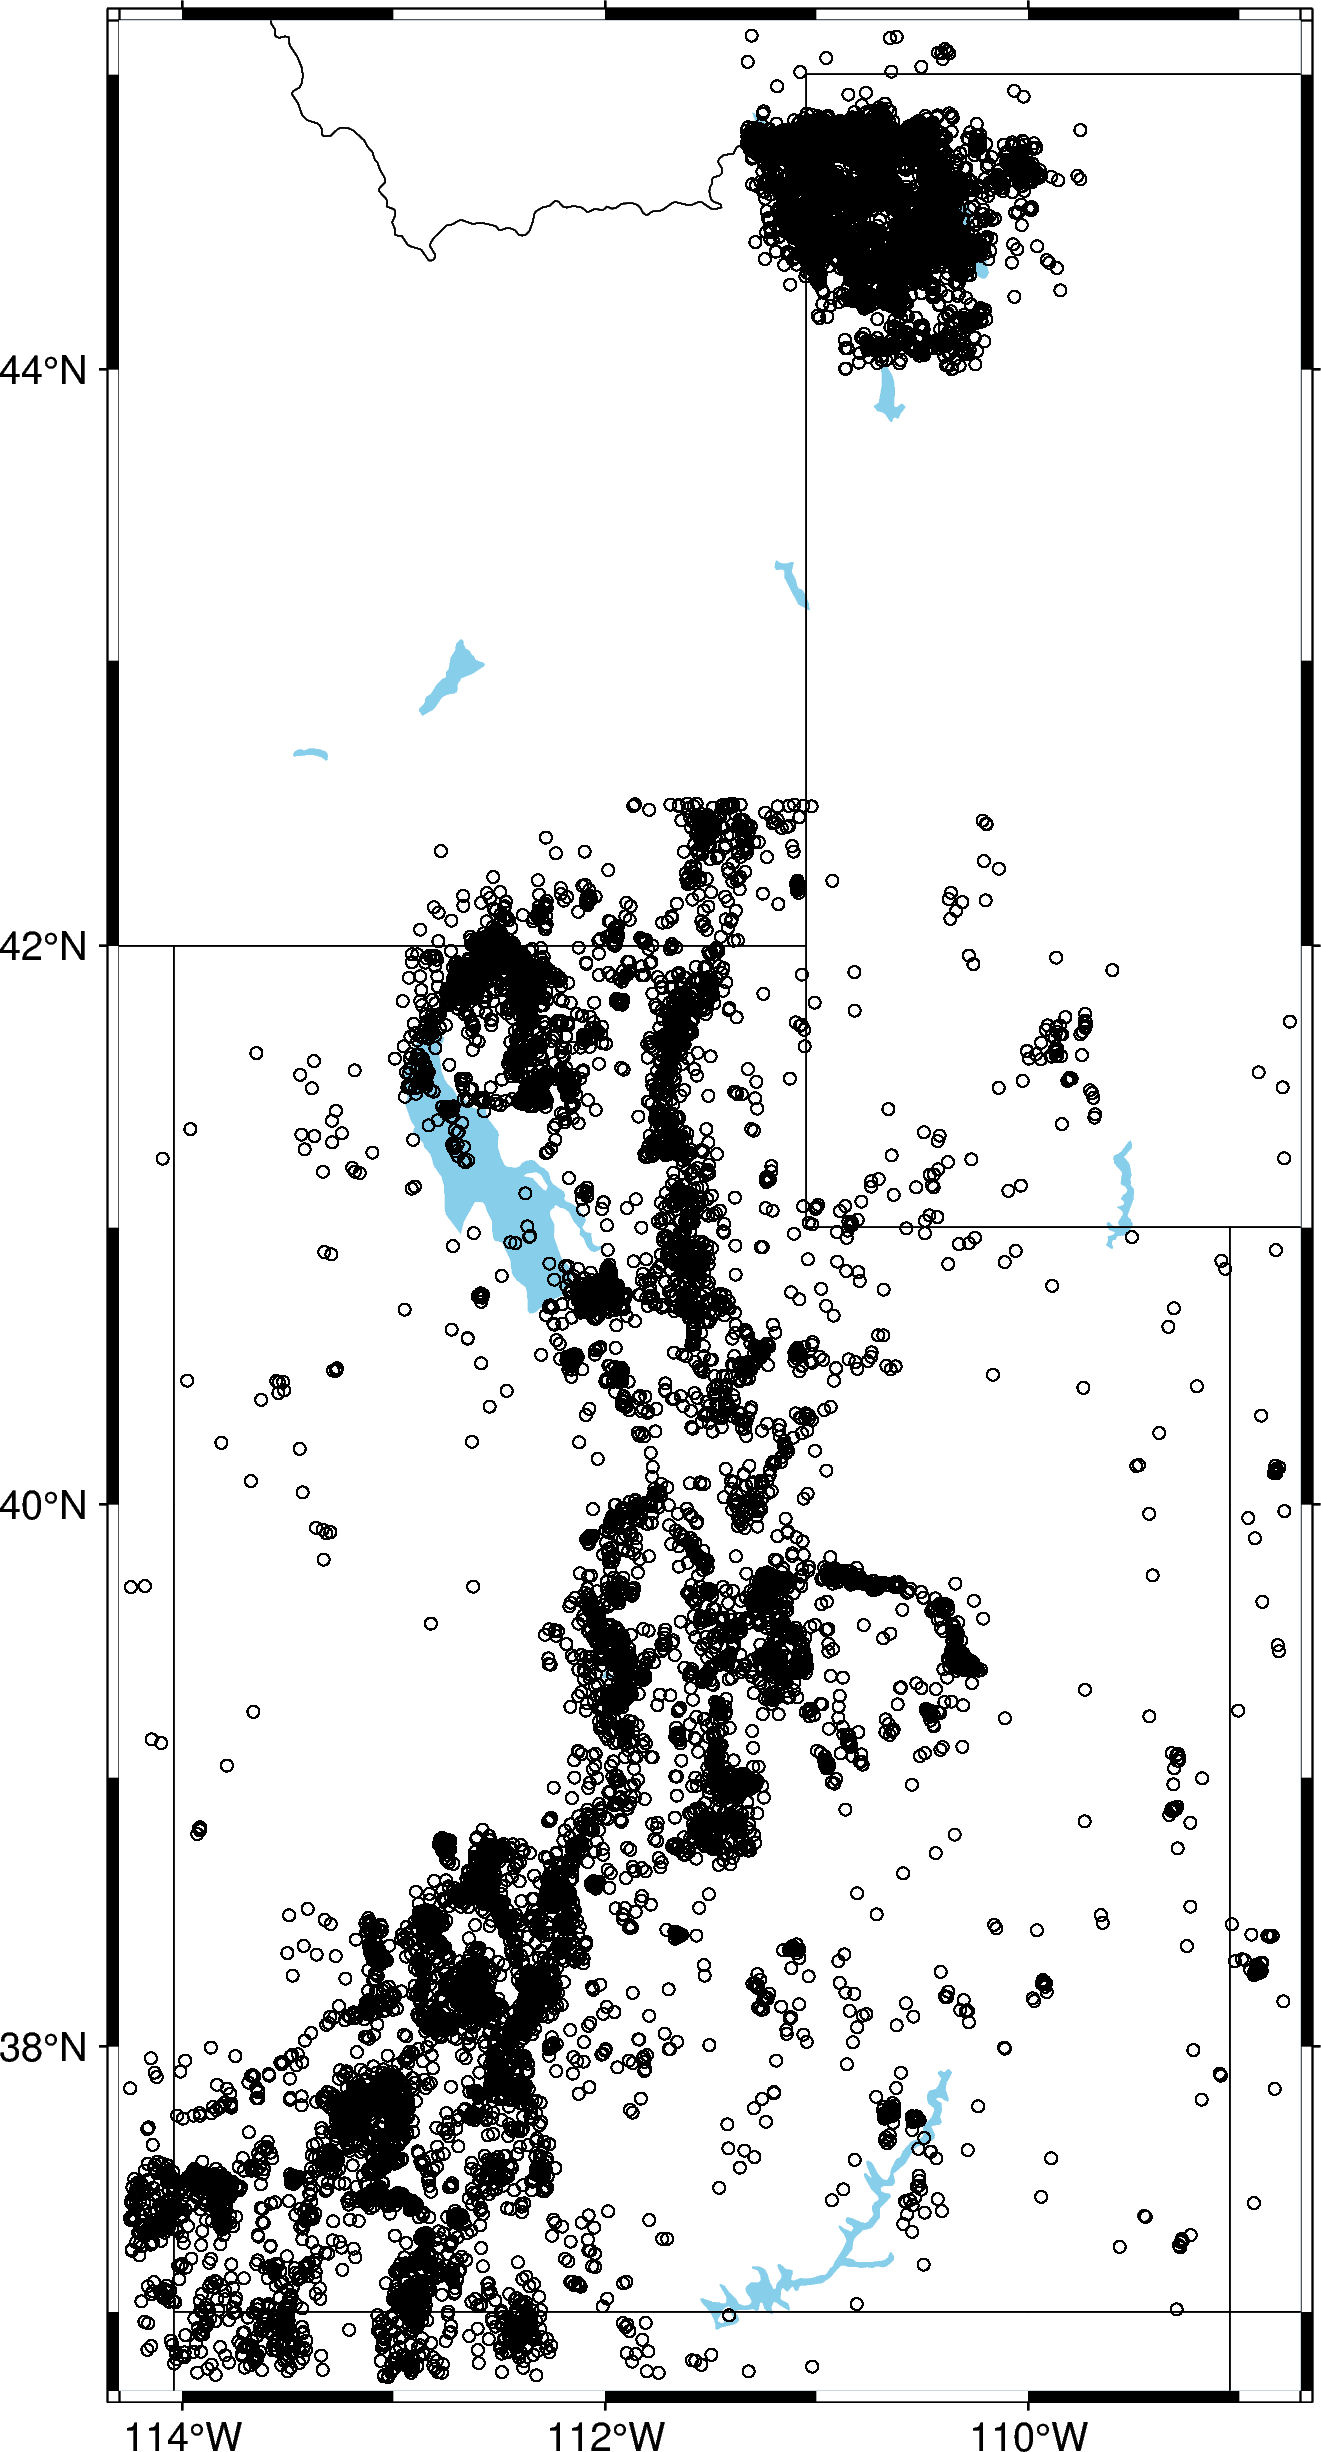

In [9]:
region = [
entire_catalog_df.event_lon.min() - 0.05,
entire_catalog_df.event_lon.max() + 0.05,
entire_catalog_df.event_lat.min() - 0.05,
entire_catalog_df.event_lat.max() + 0.05,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=entire_catalog_df[['event_lon', 'event_lat']], style="c0.1c")
fig.show()

In [10]:
keith_catalog = pd.read_csv("/uufs/chpc.utah.edu/common/home/koper-group3/alysha/cat.yellow_long", delim_whitespace=True)
keith_catalog.head()

,Date,Time,Lat,Lon,Dep,Mw,Ml,Mc,Mpref,N,Dmin,Gap,ehr,ehz,rms,evid
0,1972/11/08,09:54:28.71,44.5765,-110.6748,3.37,-9.99,-9.99,2.90,2.90,8,16.6,80,0.1,0.4,0.10,0
1,1973/01/04,01:33:08.05,44.8963,-110.7607,5.80,-9.99,-9.99,1.12,1.12,5,10.8,163,0.5,0.6,0.10,0
2,1973/01/06,13:33:06.03,44.8048,-110.4698,3.86,-9.99,-9.99,1.42,1.42,6,25.6,181,0.2,0.6,0.06,0
3,1973/01/07,02:10:33.13,44.5073,-111.1687,6.29,-9.99,-9.99,0.28,0.28,7,26.7,261,0.3,1.6,0.10,0
4,1973/01/07,06:55:54.10,44.7930,-111.5417,11.72,-9.99,-9.99,1.70,1.70,9,34.3,288,0.1,2.0,0.08,0


In [11]:
keith_catalog["utc"] = keith_catalog.apply(lambda x: datetime.strptime(f"{x.Date} {x.Time}", "%Y/%m/%d %H:%M:%S.%f"), axis=1)
keith_catalog.head()

,Date,Time,Lat,Lon,Dep,Mw,Ml,Mc,Mpref,N,Dmin,Gap,ehr,ehz,rms,evid,utc
0,1972/11/08,09:54:28.71,44.5765,-110.6748,3.37,-9.99,-9.99,2.90,2.90,8,16.6,80,0.1,0.4,0.10,0,1972-11-08 09:54:28.710
1,1973/01/04,01:33:08.05,44.8963,-110.7607,5.80,-9.99,-9.99,1.12,1.12,5,10.8,163,0.5,0.6,0.10,0,1973-01-04 01:33:08.050
2,1973/01/06,13:33:06.03,44.8048,-110.4698,3.86,-9.99,-9.99,1.42,1.42,6,25.6,181,0.2,0.6,0.06,0,1973-01-06 13:33:06.030
3,1973/01/07,02:10:33.13,44.5073,-111.1687,6.29,-9.99,-9.99,0.28,0.28,7,26.7,261,0.3,1.6,0.10,0,1973-01-07 02:10:33.130
4,1973/01/07,06:55:54.10,44.7930,-111.5417,11.72,-9.99,-9.99,1.70,1.70,9,34.3,288,0.1,2.0,0.08,0,1973-01-07 06:55:54.100


In [12]:
keith_catalog['utc'].describe()

count                            57098
mean     2004-05-19 10:27:16.607789184
min         1972-11-08 09:54:28.710000
25%      1998-02-01 13:36:25.567500032
50%         2006-02-03 05:56:06.430000
75%      2014-08-21 00:37:58.495000064
max         2022-06-30 23:17:31.520000
Name: utc, dtype: object

In [13]:
entire_catalog_df.drop_duplicates('evid')['utc'].describe()

count                                  42369
mean     2018-12-06 00:44:09.705776640+00:00
min         2012-10-01 02:34:22.939999+00:00
25%      2016-08-26 08:20:39.790000896+00:00
50%      2019-08-06 12:58:21.129999104+00:00
75%      2021-07-18 15:39:18.459998976+00:00
max         2023-12-31 19:09:45.619999+00:00
Name: utc, dtype: object

In [14]:
entire_gain_catalog_df.drop_duplicates('evid')['utc'].describe()

count                                  42369
mean     2018-12-06 00:44:09.705776640+00:00
min         2012-10-01 02:34:22.939999+00:00
25%      2016-08-26 08:20:39.790000896+00:00
50%      2019-08-06 12:58:21.129999104+00:00
75%      2021-07-18 15:39:18.459998976+00:00
max         2023-12-31 19:09:45.619999+00:00
Name: utc, dtype: object

# Filter Keith's catalog for modern data

In [15]:
keith_catalog_2012 = keith_catalog[keith_catalog['utc'] >= np.datetime64("2012-09-30")].copy()
keith_catalog_2012.head()

,Date,Time,Lat,Lon,Dep,Mw,Ml,Mc,Mpref,N,Dmin,Gap,ehr,ehz,rms,evid,utc
39003,2012/10/01,10:05:36.10,44.6752,-110.0400,15.39,-9.99,-9.99,0.25,0.25,7,11.0,157,0.8,0.6,0.05,60000092,2012-10-01 10:05:36.100
39004,2012/10/01,14:20:24.88,44.4423,-111.0167,16.18,-9.99,-9.99,0.93,0.93,14,19.0,124,1.6,0.7,0.15,60000097,2012-10-01 14:20:24.880
39005,2012/10/01,14:24:40.46,44.4382,-111.0320,6.05,-9.99,-9.99,0.35,0.35,6,19.0,140,31.6,1.1,0.22,60000010,2012-10-01 14:24:40.460
39006,2012/10/01,14:24:55.76,44.4598,-110.9865,5.97,-9.99,-9.99,1.11,1.11,7,19.0,186,31.6,0.8,0.09,60000096,2012-10-01 14:24:55.760
39007,2012/10/01,14:27:34.70,44.4455,-111.0510,6.00,-9.99,-9.99,1.39,1.39,7,18.0,147,31.6,0.8,0.12,60000101,2012-10-01 14:27:34.700


In [16]:
keith_catalog_2012['utc'].describe()

count                            18095
mean     2017-11-11 09:55:13.505534208
min         2012-10-01 10:05:36.100000
25%         2015-03-20 02:15:56.960000
50%         2017-08-19 14:58:16.720000
75%      2020-05-29 18:19:35.809999872
max         2022-06-30 23:17:31.520000
Name: utc, dtype: object

# Filter ben's catalog by location - there are ~18K events in the Yellowstone region 

In [17]:
ys_lon_bounds = [-111.333, -109.75, 44, 45.167]
ys_lat_bounds = [44, 45.167]

In [18]:
# Filter to just be in Yellowstone region, anything greater than 43/44 should be in Yellowstone
ys_df = entire_catalog_df[(entire_catalog_df["event_lat"] > ys_lat_bounds[0]) & (entire_catalog_df["event_lat"] < ys_lat_bounds[1]) &
                         (entire_catalog_df["event_lon"] > ys_lon_bounds[0]) & (entire_catalog_df["event_lon"] < ys_lon_bounds[1])].sort_values("evid")

In [19]:
ys_df.drop_duplicates('evid')['utc'].describe()

count                                  21075
mean     2018-08-31 00:19:55.993242624+00:00
min         2012-10-01 10:05:36.099998+00:00
25%      2016-03-06 01:21:59.244999168+00:00
50%         2018-04-11 17:04:19.160000+00:00
75%      2021-07-17 06:27:55.989999616+00:00
max         2023-12-31 12:39:40.480000+00:00
Name: utc, dtype: object

In [20]:
ys_gain_df =  entire_gain_catalog_df[(entire_gain_catalog_df["event_lat"] > ys_lat_bounds[0]) & (entire_gain_catalog_df["event_lat"] < ys_lat_bounds[1]) &
                         (entire_gain_catalog_df["event_lon"] > ys_lon_bounds[0]) & (entire_gain_catalog_df["event_lon"] < ys_lon_bounds[1])].sort_values("evid")

In [21]:
ys_gain_df.drop_duplicates('evid')['utc'].describe()

count                                  21075
mean     2018-08-31 00:19:55.993242624+00:00
min         2012-10-01 10:05:36.099998+00:00
25%      2016-03-06 01:21:59.244999168+00:00
50%         2018-04-11 17:04:19.160000+00:00
75%      2021-07-17 06:27:55.989999616+00:00
max         2023-12-31 12:39:40.480000+00:00
Name: utc, dtype: object

# Compare Gain with Other Catalog

In [22]:
ys_df.shape

(266134, 25)

In [23]:
ys_gain_df.shape

(266134, 31)

In [24]:
np.array_equal(ys_df.drop_duplicates('evid')['evid'], ys_gain_df.drop_duplicates('evid')['evid'])

True

# Save arrival catalogs

In [27]:
# Arrivals with gains
ys_gain_df.to_csv(f"{catalog_dir}/yellowstone_arrivals_gains_20121001_20240101.csv", index=False)

In [26]:
ys_gain_df.columns

Index(['evid', 'network', 'station', 'location', 'channelz', 'phase',
       'arrival_id', 'arrival_time', 'pick_quality', 'first_motion',
       'take_off_angle', 'source_receiver_distance', 'source_receiver_azimuth',
       'travel_time_residual', 'receiver_lat', 'receiver_lon', 'receiver_elev',
       'event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'gain_z', 'gain_units', 'low_freq_corners_z',
       'high_freq_corners_z', 'channel_dip_z', 'channel_azimuth_z', 'utc'],
      dtype='object')

In [28]:
# Event cat
ys_ev_df = ys_gain_df.drop_duplicates('evid')[['evid', 'event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'utc']]
ys_ev_df.to_csv(f"{catalog_dir}/yellowstone_events_20121001_20240101.csv", index=False)

# Compare Ben and Keith's catalogs

### 228 more events from 2012/10/01 to 2022/07/01 in Keith's catalog than Ben's
Events seem to be spread out over the whole time period too 

One event in Ben's catalog and not Keith's. Evid also not in USGS database.

Main difference in catalogs (~200 events) is that Ben has a lower lon (left) limit of -111.333, whereas Keith uses -111.5
23 events are to the right of -111.333, so I am not sure why they are missing. All but 1 do not have a magnitude assigned. The largest missing from Ben's catalog is a 3.04. Some of the -9.99 events are not on the USGS either, but some of them are.

In [29]:
keith_catalog_2012['utc'].describe()

count                            18095
mean     2017-11-11 09:55:13.505534208
min         2012-10-01 10:05:36.100000
25%         2015-03-20 02:15:56.960000
50%         2017-08-19 14:58:16.720000
75%      2020-05-29 18:19:35.809999872
max         2022-06-30 23:17:31.520000
Name: utc, dtype: object

In [30]:
ys_ev_match_keith = ys_df[ys_df['utc'].dt.date < np.datetime64('2022-07-01')].drop_duplicates('evid')
ys_ev_match_keith['utc'].describe()

count                                  17867
mean     2017-11-14 00:32:14.080162048+00:00
min         2012-10-01 10:05:36.099998+00:00
25%      2015-03-27 15:53:46.645000192+00:00
50%      2017-08-20 09:28:42.149998080+00:00
75%      2020-05-29 23:24:56.974999552+00:00
max         2022-06-30 23:17:31.519999+00:00
Name: utc, dtype: object

In [31]:
len(keith_catalog_2012) - len(ys_ev_match_keith)

228

In [32]:
merge_keith = keith_catalog_2012[['evid', 'utc', 'Mpref', 'Lat', 'Lon']].merge(ys_ev_match_keith[['evid', 'utc', 'event_lon', 'event_lat']], on='evid', how='outer', indicator=True)

In [33]:
merge_keith[merge_keith['_merge'] == 'left_only'][['utc_x', 'Mpref']].describe()

,utc_x,Mpref
count,229,229.000000
mean,2017-04-13 23:48:37.010218496,-0.139825
min,2012-10-07 01:45:29.470000,-9.990000
25%,2014-05-21 19:07:04.960000,0.540000
50%,2016-10-28 23:03:06.280000,0.900000
75%,2019-11-16 11:35:28.580000,1.350000
max,2022-05-30 20:08:08.680000,3.790000
std,NaN,3.583636


In [34]:
merge_keith[merge_keith['_merge'] == 'right_only']

,evid,utc_x,Mpref,Lat,Lon,utc_y,event_lon,event_lat,_merge
18095,60000355,NaT,NaN,NaN,NaN,2012-12-07 13:32:03.040000+00:00,-110.562333,44.496333,right_only


In [37]:
merge_keith[merge_keith['Mpref'] == 3.79]

,evid,utc_x,Mpref,Lat,Lon,utc_y,event_lon,event_lat,_merge
870,60026297,2013-06-06 02:09:19.780,3.79,44.8442,-111.4618,NaT,NaN,NaN,left_only


In [35]:
keith_catalog_2012[keith_catalog_2012['Mpref'] == 3.79]

,Date,Time,Lat,Lon,Dep,Mw,Ml,Mc,Mpref,N,Dmin,Gap,ehr,ehz,rms,evid,utc
39873,2013/06/06,02:09:19.78,44.8442,-111.4618,12.56,-9.99,3.79,3.6,3.79,37,3.0,64,0.7,0.4,0.2,60026297,2013-06-06 02:09:19.780


In [38]:
ys_df[ys_df.evid == 60026297]

,evid,network,station,location,channelz,phase,arrival_id,arrival_time,pick_quality,first_motion,...,receiver_lon,receiver_elev,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc


In [39]:
ys_ev_match_keith[ys_ev_match_keith['magnitude'] > 3.6]

,evid,network,station,location,channelz,phase,arrival_id,arrival_time,pick_quality,first_motion,...,receiver_lon,receiver_elev,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
3829,60003995,WY,YHL,01,HHZ,P,10102631,1.396192e+09,1.0,-1,...,-111.183000,2691.0,44.780500,-110.721833,3.48,1.396192e+09,3.66,l,F,2014-03-30 15:12:24.330000+00:00
65218,60061837,PB,B208,01,EHZ,P,10098185,1.396183e+09,1.0,-1,...,-110.401500,2405.8,44.772167,-110.684667,5.62,1.396183e+09,4.83,w,F,2014-03-30 12:34:39.160000+00:00
118649,60203137,WY,YNR,01,HHZ,P,10278184,1.497574e+09,1.0,-1,...,-110.679170,2336.0,44.781333,-111.033167,9.30,1.497574e+09,4.36,l,F,2017-06-16 00:48:46.939999+00:00
129135,60217692,IW,FLWY,00,BHZ,P,10302970,1.500410e+09,1.0,1,...,-110.699888,2078.0,44.787500,-111.037833,10.51,1.500410e+09,3.61,l,F,2017-07-18 20:31:10.469999+00:00
286654,60447002,PB,B207,,EHZ,P,10702077,1.626483e+09,1.0,1,...,-110.848500,2182.0,44.462167,-110.344333,6.38,1.626483e+09,3.63,l,F,2021-07-17 00:45:35.079998+00:00
155779,60497322,WY,YMS,01,EHZ,P,10775869,1.652276e+09,1.0,-1,...,-110.527830,3106.0,44.681000,-109.996333,13.95,1.652276e+09,4.22,l,F,2022-05-11 13:32:02.230000+00:00


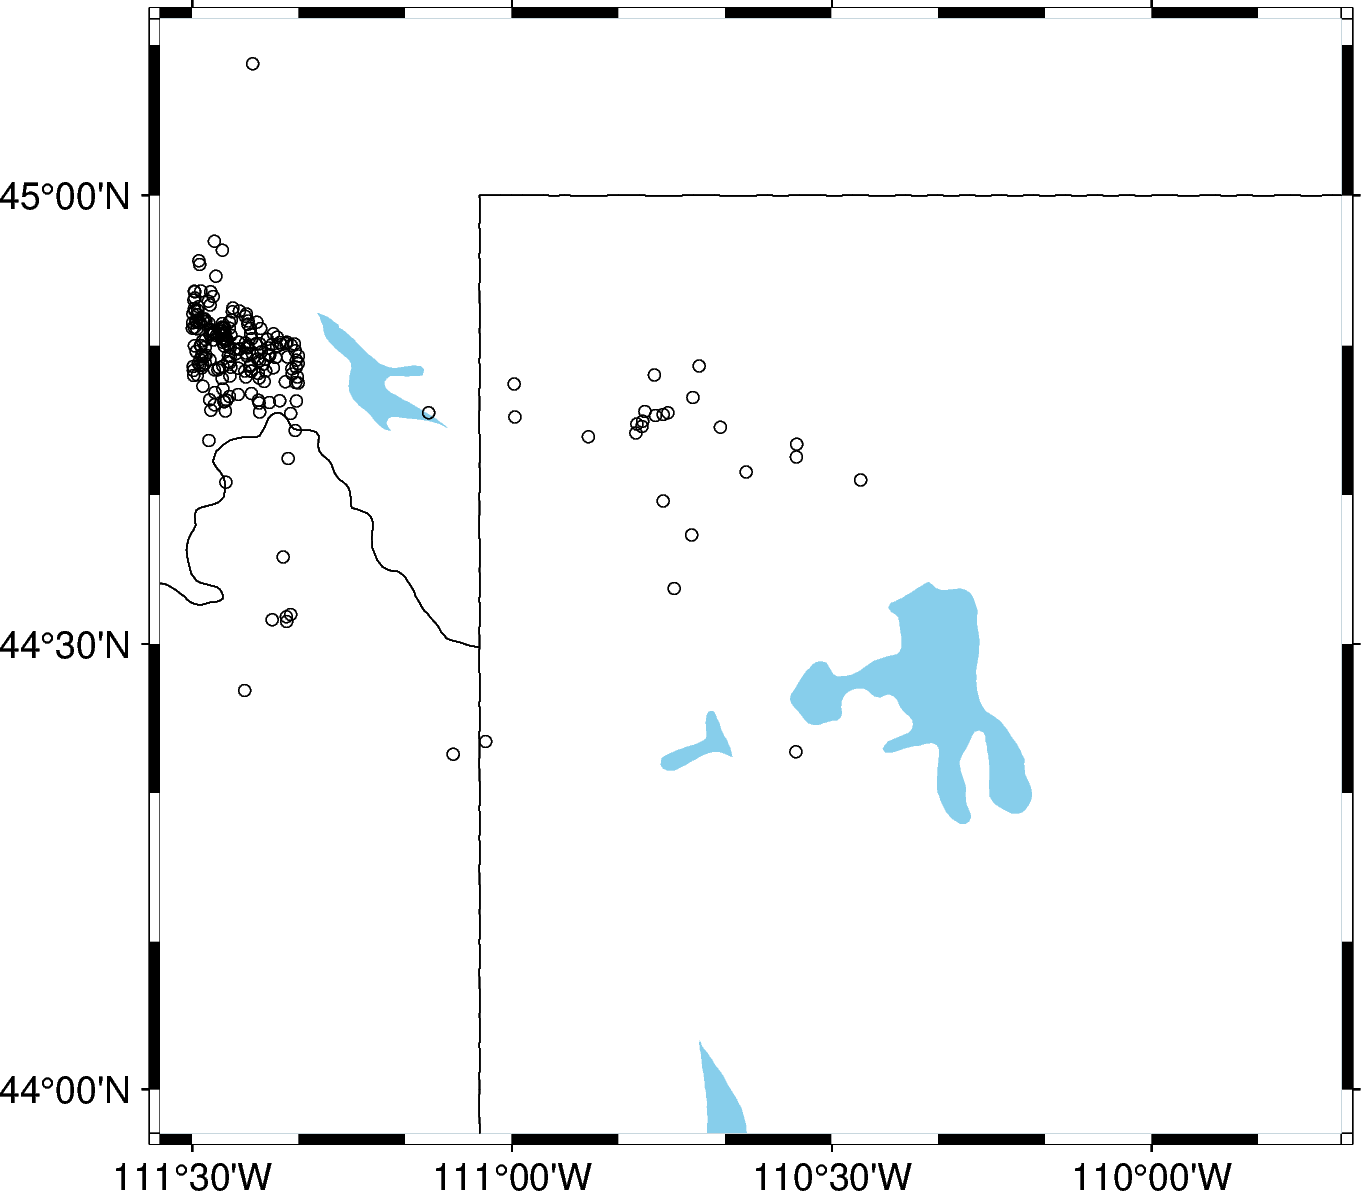

In [40]:
region = [
keith_catalog_2012.Lon.min() - 0.05,
keith_catalog_2012.Lon.max() + 0.05,
keith_catalog_2012.Lat.min() - 0.05,
keith_catalog_2012.Lat.max() + 0.05,
]

# Plot locations of events only in Keith's catalog
fig = pygmt.Figure()
fig.basemap(region=region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=merge_keith[merge_keith['_merge'] == 'left_only'][['Lon', 'Lat']], style="c0.1c")
fig.show()

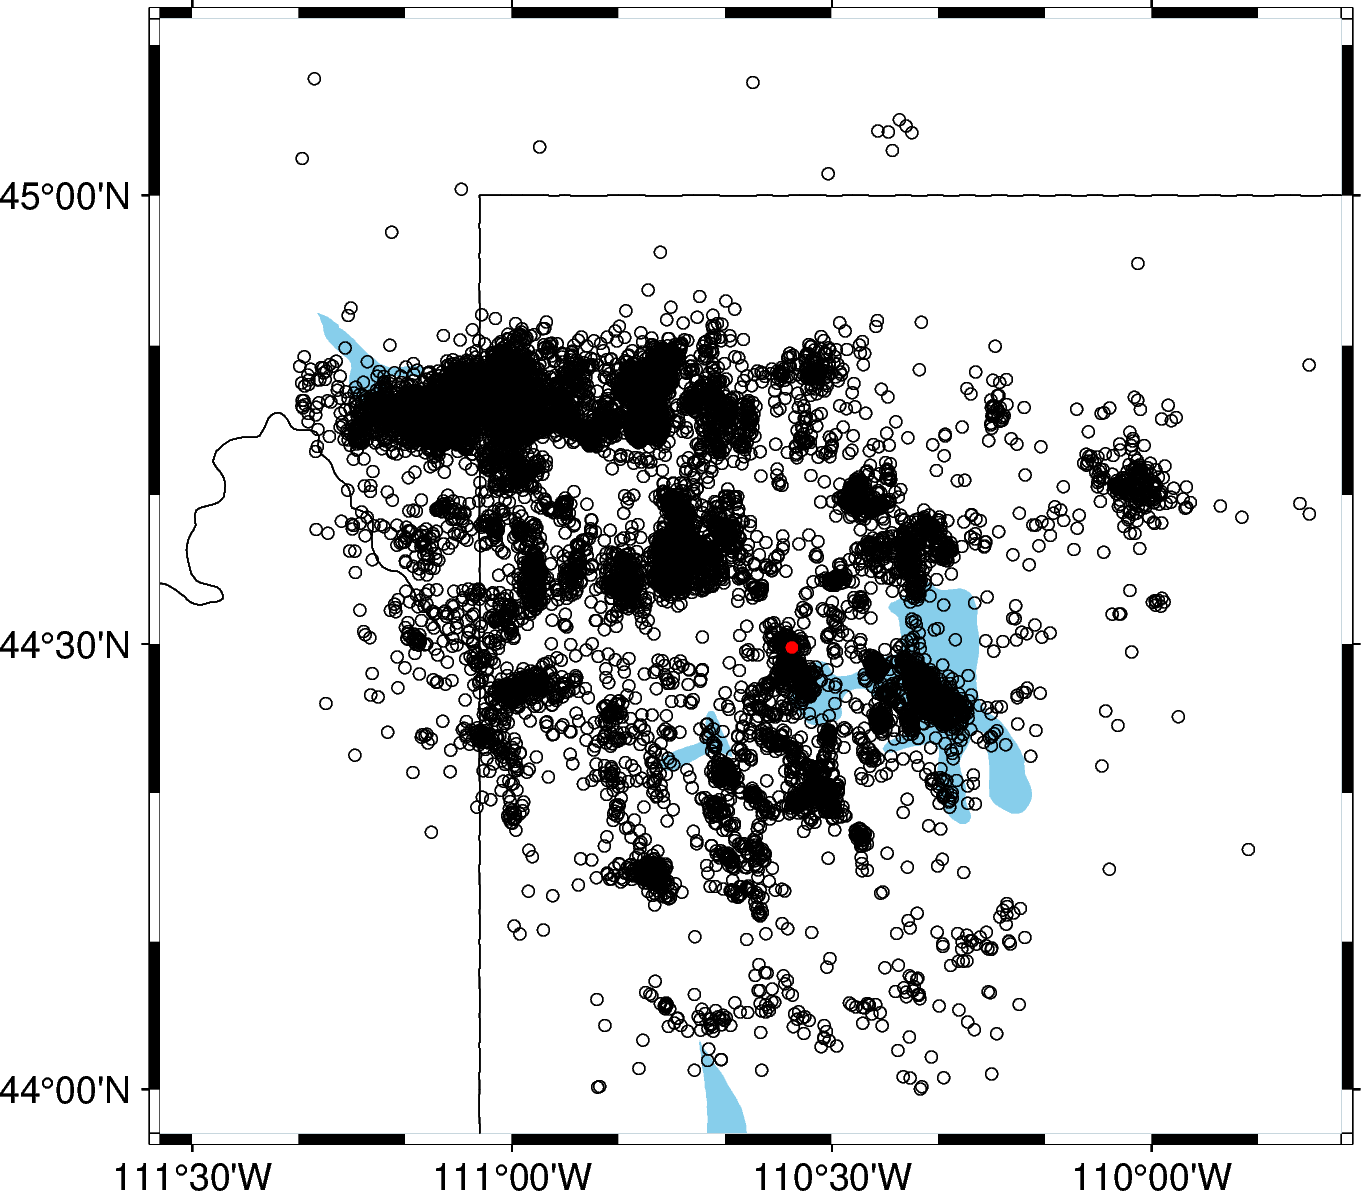

In [41]:
# Plot locations in Ben's catalog
fig = pygmt.Figure()
fig.basemap(region=region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=ys_ev_match_keith[['event_lon', 'event_lat']], style="c0.1c")
fig.plot(data=merge_keith[merge_keith['_merge'] == 'right_only'][['event_lon', 'event_lat']], style="c0.1c", fill='red')
fig.show()

In [42]:
keith_catalog_2012.Lon.min()

-111.4995

In [43]:
ys_ev_match_keith['event_lon'].min()

-111.3316667

I'm not totally sure about the 23 events in Keith's catalog that are to the right of -111.133 though... Most of them are small, and only 1 is assigned a magnitude. There is a M 3.04 that is in Keith's and USGS catalog that is not in Ben's.

In [44]:
merge_keith[(merge_keith['_merge'] == 'left_only') & (merge_keith['Lon'] > -111)][['utc_x', 'Mpref']].describe()

,utc_x,Mpref
count,23,23.000000
mean,2016-05-14 16:45:45.799565056,-9.423478
min,2013-09-26 21:20:31.090000,-9.990000
25%,2014-03-05 08:28:20.225000192,-9.990000
50%,2014-03-30 13:50:48.120000,-9.990000
75%,2019-05-24 00:39:12.355000064,-9.990000
max,2021-11-14 08:55:26.060000,3.040000
std,NaN,2.716943


In [47]:
merge_keith[(merge_keith['_merge'] == 'left_only') & (merge_keith['Lon'] > -111)].sort_values('Mpref')

,evid,utc_x,Mpref,Lat,Lon,utc_y,event_lon,event_lat,_merge
1645,60039037,2013-09-26 21:20:31.090,-9.99,44.7358,-110.8062,NaT,NaN,NaN,left_only
2558,60055757,2014-02-14 01:54:41.150,-9.99,44.7232,-110.5550,NaT,NaN,NaN,left_only
2560,60003100,2014-02-14 01:55:38.770,-9.99,44.7090,-110.5552,NaT,NaN,NaN,left_only
2612,60003215,2014-02-17 06:51:24.660,-9.99,44.7595,-110.7923,NaT,NaN,NaN,left_only
2653,60057247,2014-02-23 13:07:35.270,-9.99,44.6923,-110.6340,NaT,NaN,NaN,left_only
2695,60003310,2014-03-03 21:20:20.620,-9.99,44.7582,-110.7562,NaT,NaN,NaN,left_only
2709,60003400,2014-03-06 19:36:19.830,-9.99,44.7562,-110.7635,NaT,NaN,NaN,left_only
2711,60003405,2014-03-07 09:31:51.820,-9.99,44.7458,-110.8048,NaT,NaN,NaN,left_only
2714,60058572,2014-03-07 14:00:15.680,-9.99,44.7422,-110.6740,NaT,NaN,NaN,left_only
2784,60003570,2014-03-21 07:32:14.740,-9.99,44.7488,-110.7958,NaT,NaN,NaN,left_only
